# Data Exploration

We will now explore the data and try to gain some biological insight from it. 

**Before the starting the Tutors will give an introduction, if you are ready for this step please let them know!**

The dataset we will work with consists of a time-lapse data of ...

---

## Import packages

Before starting the code we need to import all the required packages.

We use a number of important Python packages:
- [Numpy](https://numpy.org): Goto package for vector/matrix based calculations (heavily inspired by Matlab)
- [Pandas](https://pandas.pydata.org): Goto package for handling data tables (heavily inspired by R) 
- [Matplotlib](https://matplotlib.org): Goto package for plotting data
- [Seaborn](https://seaborn.pydata.org): Fancy plots made easy (Similar to ggplot in R)
- [pathlib](https://docs.python.org/3/library/pathlib.html): Path handling made easy

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%gui qt

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
matplotlib.rc("figure", figsize=(10,5))

import seaborn as sns

import pathlib

import re

---

## Setup Folders
As always we start with specifying the data paths:

In [2]:
proj_dir = pathlib.Path(pathlib.Path.home(), 'I2ICourse', 'Project2C')
df_name = proj_dir / 'cell_data_all.csv'

---

## Load Data
Up to now we only worked with data from a single position, however this gives us only very few cells to work with. Before the start of the course we analyzed the full dataset consisting of X positions. Here we will load this complete dataset for further analysis.

In [3]:
#load data frame
df = pd.read_csv(df_name, sep=';')
df.head()

,Position,PositionIdx,Indices,Frame,Idx,Time,BacteriaLineage,NextDivisionFrame,PreviousDivisionFrame,SizeRatio,...,SizeAtBirthSpineLength,Spinelength,GrowthRateFeretMax,SizeAtBirthFeretMax,FeretMax,GrowthRateSpineWidth,SizeAtBirthSpineWidth,SpineWidth,MeanIntensityRFP,MeanIntensityGFP
0,xy00,0,0-0-0,0,0,0.0,A,4.0,NaN,NaN,...,25.2495,24.6917,0.058864,27.7199,27.0740,-0.011026,4.9342,4.6589,209.4800,1053.1000
1,xy00,0,0-0-1,0,1,0.0,B,4.0,NaN,NaN,...,25.9192,26.9725,0.053829,27.9746,29.0689,0.004870,4.2546,4.0620,189.7748,1135.8000
2,xy00,0,0-0-2,0,2,0.0,C,1.0,NaN,NaN,...,NaN,58.8917,NaN,NaN,61.0737,NaN,NaN,5.0001,200.7550,1156.4000
3,xy00,0,0-0-3,0,3,0.0,D,NaN,NaN,NaN,...,30.2778,30.2778,-0.216700,33.1361,33.1361,-0.064291,4.1022,4.1022,198.7530,997.1145
4,xy00,0,0-1-0,0,0,0.0,A,4.0,NaN,NaN,...,38.0392,39.5609,0.040383,41.7195,42.1070,-0.047089,5.3362,4.9735,316.3908,1126.3000


---

## Add unique lineage identifier

We use the code we made in the previous notebook to add a channel index and a unique lineage identifier

In [4]:
def add_info(df):
    ChIdx = [int(re.split("\-",ind)[1]) for ind in df['Indices']]
    df['ChannelIdx'] = ChIdx
    
    #combine PositionIdx-ChannelIdx-BacteriaLineage into single string and add string lin_id_str property
    df['lin_id_str'] = df['PositionIdx'].map(str) + '-' + df['ChannelIdx'].map(str) + '-' + df['BacteriaLineage'].map(str)
    
    return None

In [5]:
add_info(df)
df.head()

,Position,PositionIdx,Indices,Frame,Idx,Time,BacteriaLineage,NextDivisionFrame,PreviousDivisionFrame,SizeRatio,...,GrowthRateFeretMax,SizeAtBirthFeretMax,FeretMax,GrowthRateSpineWidth,SizeAtBirthSpineWidth,SpineWidth,MeanIntensityRFP,MeanIntensityGFP,ChannelIdx,lin_id_str
0,xy00,0,0-0-0,0,0,0.0,A,4.0,NaN,NaN,...,0.058864,27.7199,27.0740,-0.011026,4.9342,4.6589,209.4800,1053.1000,0,0-0-A
1,xy00,0,0-0-1,0,1,0.0,B,4.0,NaN,NaN,...,0.053829,27.9746,29.0689,0.004870,4.2546,4.0620,189.7748,1135.8000,0,0-0-B
2,xy00,0,0-0-2,0,2,0.0,C,1.0,NaN,NaN,...,NaN,NaN,61.0737,NaN,NaN,5.0001,200.7550,1156.4000,0,0-0-C
3,xy00,0,0-0-3,0,3,0.0,D,NaN,NaN,NaN,...,-0.216700,33.1361,33.1361,-0.064291,4.1022,4.1022,198.7530,997.1145,0,0-0-D
4,xy00,0,0-1-0,0,0,0.0,A,4.0,NaN,NaN,...,0.040383,41.7195,42.1070,-0.047089,5.3362,4.9735,316.3908,1126.3000,1,0-1-A


---

## A bit more Pandas

For how to use Pandas, please refer to the Project 2A notebook.

Here we just give one last example. Sometime you might be interested in the property of a cell at birth or division. For that Pandas has a very neat function: just combine `groupby` to group cells based on their unique `lin_id` with `first` or `last` to extract the first or last entry of each cell.

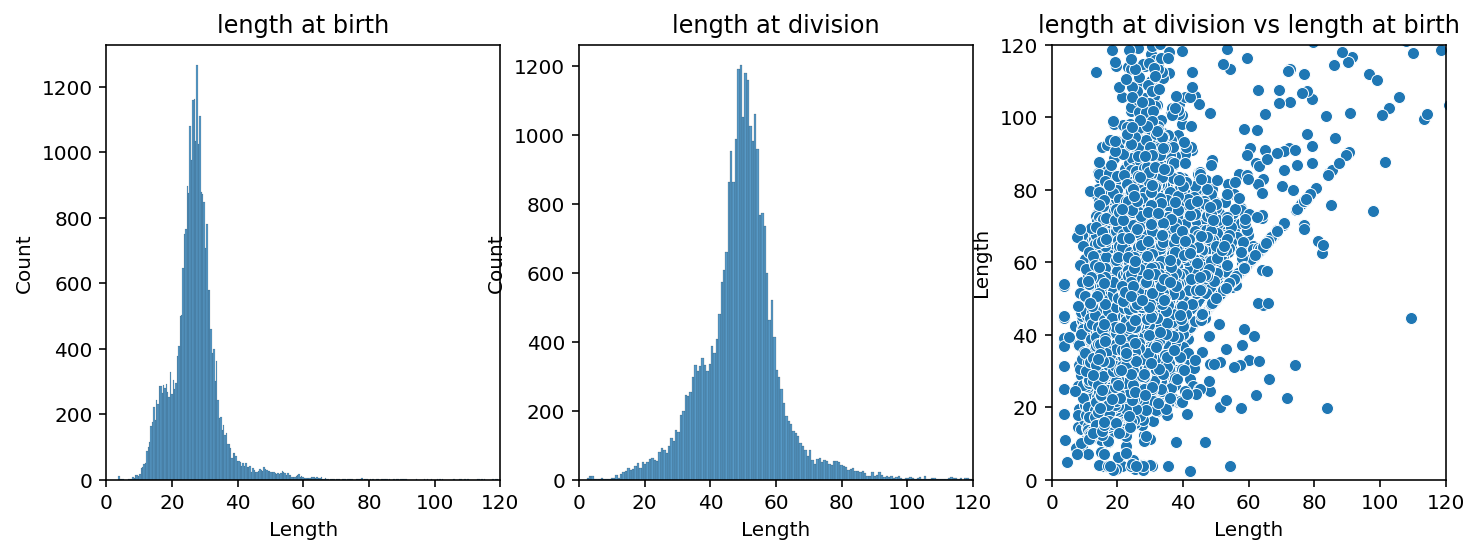

In [6]:
import seaborn as sns

df['Length'] = df['Spinelength']

#get first and last frame of all cells
df_first_frame = df.groupby('lin_id_str').first()
df_last_frame = df.groupby('lin_id_str').last()

#we only want cells of which we have observed the full lineage
#and exclude the ones that have no offspring (d1_lin_id=-1)
#we can filter these out with:
df_first_frame = df_first_frame.loc[~np.isnan(df_first_frame['NextDivisionFrame'])]
df_last_frame = df_last_frame.loc[~np.isnan(df_last_frame['NextDivisionFrame'])]

fig, axs = plt.subplots(1,3, figsize=(12,4))
sns.histplot(ax=axs[0], data=df_first_frame, x='Length', )
sns.histplot(ax=axs[1], data=df_last_frame, x='Length')
sns.scatterplot(ax=axs[2], x=df_first_frame['Length'], y=df_last_frame['Length'])

for ax in axs: ax.set(xlim=(0,120)) 
axs[2].set(ylim=(0,120))

titles = ['length at birth', 'length at division', 'length at division vs length at birth'] 
for idx, title in enumerate(titles): axs[idx].set_title(title)

---

## Exercise

Now it is time for some biology. Discuss with your tutor want kind of biological questions you could address with this data.  
Some ideas:
- How do cells respond to the nutrient switches? how does growth rate, cell size, etc, change? What is the variation between cells?
- Is there a correlation between the response between the first and second switch?
- Are there any correlations between the phenotypes of closely related cells?
- Are there correlations between different cell properties (growth rate, size, etc)?
- Does the phenotype of cells depend on the position in the channel?
- etc

Bacmman calculates quite some cell properties, but there might also be other interesting phenotypes that Bacmman does not calculate by default. For example Bacmman calculates the average growth rate over a cell's life, but the growth rate can change between division events, for example when nutrients change. You might thus have to do some calculation of your own to find, e.g.:
- Cell elongation rate (rate at which cell length increases) as function of time
  - Hint: cell length is described by $l(t) = l(0) \cdot e^{r\cdot t}$ where $r$ is the elongation/growth rate
  - Hint: elongation rates can change during the life of a cell, how could you quantify this?
- Lag time: time the cells need to start growing again after nutrient switch
  - Hint: you can use either length increase or growth rate increase to measure lag time
- etc.

Think about how you could estimate these quantities from the data you do have. 

In [7]:
#Add your code here

---

## Calculate Promoter Activity

Here we estimate promoter activity fllowing SI of [Locke 2011](https://doi.org/10.1126/science.1208144)

Calculates promoter activity by unit cell length in units of 1/min (set by units of dt and gamma)

In [13]:
def derivative(y, frm_interval=1, log = False):
    if y.size > 2:
        y = np.log(y) if log else y
        x = np.arange(y.size) * frm_interval
        p = np.polyfit(x, y, 1) #simply 1st order polynomial fit / regression (numpy.polyfit)
        ddt = p[0] #slope of first order fit in python p[0]
    else: 
        ddt = np.nan 
    return ddt 

In [14]:
frm_interval = 10./60 #frame interval in minutes
gamma = 0.0015 #protein degradation constant in 1/min

mu = df.groupby('lin_id_str')['Spinelength'].rolling(3, min_periods=2, center=True).apply(derivative, kwargs={'frm_interval':frm_interval, 'log':True}).reset_index(0,drop=True)
df['mu'] = mu

ddt_gfp = df.groupby('lin_id_str')['MeanIntensityGFP'].rolling(3, min_periods=2, center=True).apply(derivative, kwargs={'frm_interval':frm_interval}).reset_index(0,drop=True)
df['ddt_gfp'] = ddt_gfp

ddt_rfp = df.groupby('lin_id_str')['MeanIntensityRFP'].rolling(3, min_periods=2, center=True).apply(derivative, kwargs={'frm_interval':frm_interval}).reset_index(0,drop=True)
df['ddt_rfp'] = ddt_rfp


df['promoter_act_G'] = (gamma + df['mu'] ) * df['MeanIntensityGFP'] + df['ddt_gfp']
df['promoter_act_R'] = (gamma + df['mu'] ) * df['MeanIntensityRFP'] + df['ddt_rfp']

df.head()